In [54]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [63]:
k=7.5
n=3.1

In [64]:
fi=math.pi/3
x1=k/(n+1)

In [65]:
def dr(r,tetha):
    dr = r/math.sqrt(n*n-1)
    return dr

In [66]:
r0=x1

In [67]:
tetha0=0

In [68]:
tetha=np.arange(tetha0, 2*math.pi, 0.01)

In [69]:
r=odeint(dr,r0,tetha)

In [70]:
def f2(t):
    xt=math.tan(fi+math.pi)*t
    return xt

def f3(t1):
    xt=math.tan(tetha0)*t1
    return xt

In [71]:
t=np.arange(0,10,1)
t1=np.arange(r0, k, 0.01)

In [72]:
def cart2pol(x,y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return rho, phi

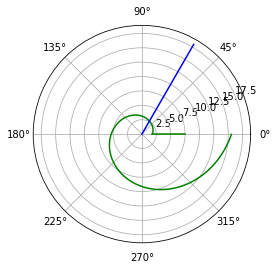

In [73]:
r1, tetha1 = cart2pol(t, f2(t))
r2, tetha2 = cart2pol(t1, f3(t1))
plt.polar(tetha,r,'g')
plt.polar(tetha2, r2, 'g')
plt.polar(tetha1,r1,'b')

In [74]:
crosspoint = odeint(dr,r0,np.arange(0, fi, 0.01))[-1]
crosspoint

array([2.60738314])

In [75]:
x2 = k/(n-1)
r0 = x2
tetha0 = -math.pi
tetha = np.arange(tetha0, -tetha0, 0.01)
r=odeint(dr,r0,tetha)

In [76]:
t1=np.arange(-k, -r0, 0.01)
t=np.arange(0,10,1)

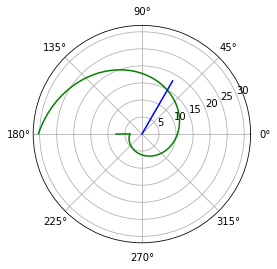

In [77]:
r1, tetha1 = cart2pol(t, f2(t))
r2, tetha2 = cart2pol(t1, f3(t1))
plt.polar(tetha,r,'g')
plt.polar(tetha2, r2, 'g')
plt.polar(tetha1,r1,'b')

In [78]:
crosspoint = odeint(dr,r0,np.arange(0, fi, 0.01))[-1]
crosspoint

array([5.09060519])